<a href="https://colab.research.google.com/github/changnos/2023-2-CECD3-Release-8/blob/main/test_jajinmori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**자진모리장단 테스트**
1.   파일 입력
2.   박자 체크
3.   소리 구분



**자진모리 장단**
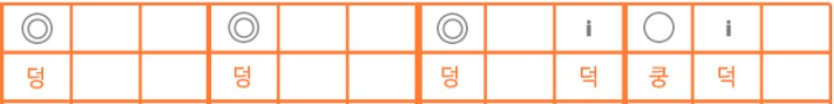

##**1. 파일 입력**

In [ ]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.io import wavfile
from glob import glob
from tqdm import tqdm

%matplotlib inline

sns.set_style('darkgrid')

In [ ]:
!sudo pip install numba
!sudo pip install llvmlite
!sudo pip install librosa

#한글 깨짐 방지
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import librosa.display, librosa
sig, sr = librosa.load('/content/jajinmori.wav')
S = librosa.feature.melspectrogram(y=sig, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()
plt.show()

audio_file = "jajinmori.wav"  # 오디오 파일 경로를 지정합니다.
y, sr = librosa.load(audio_file)
D = np.abs(librosa.stft(y))
onset_env = librosa.onset.onset_strength(y=y, sr=sr,
                                         hop_length=512,
                                         aggregate=np.median)

peaks = librosa.util.peak_pick(onset_env, pre_max=1, post_max=3, pre_avg=5, post_avg=5, delta=5, wait=10)


In [ ]:
times = librosa.times_like(onset_env, sr=sr, hop_length=512)
plt.figure(figsize=(12, 4))
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max),
                         y_axis='log', x_axis='time')
plt.vlines(times[peaks], 0,
             11025, color='w', alpha=0.8,
             label='Peaks', linewidth=5)
plt.show()

##**2. 박자 체크**

In [ ]:
# 자진모리장단 박자
st = [3, 3, 2, 1, 1, 2]
name = ['덩', '덩', '덩', '덕', '쿵', '덕']
sum = 0
for i in range(len(peaks) - 1):
    sum += (peaks[i+1] - peaks[i])

print("[박자 정확도]")
for i in range(len(peaks) - 1):
    print(name[i], (peaks[i+1] - peaks[i])/st[i]/(sum/10))
print(name[len(name)-1], 1)

##**3. 소리 구분**

In [ ]:
# 스펙트로그램 계산
D = np.abs(librosa.stft(y))

# 스펙트로그램을 dB로 변환
D_db = librosa.amplitude_to_db(D, ref=np.max)

# 각 peak를 기준으로 음성 데이터를 나누어서 그래프로 시각화합니다.
tmp1 = np.array([0])
tmp2 = np.array([len(times)-1])
# peaks = np.insert(peaks, tmp1, 0)
peaks = np.append(peaks, tmp2)

for i in range(len(peaks) - 1):
    start_frame = peaks[i]
    end_frame = peaks[i + 1]
    term = end_frame - start_frame
    segment = D_db[:, (start_frame - 5):(end_frame - 5)]

    # 개별 그래프로 시각화
    plt.figure(figsize=(12, 4))
    librosa.display.specshow(segment, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Segment{i + 1} ({start_frame} - {end_frame})')
    plt.tight_layout()

plt.show()